<a href="https://colab.research.google.com/github/dsliwka/EEMP2023/blob/main/WS1920_EEMP_exam_PT1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *- Solutions -*

# 1253BMEE00 FA MP MB Econometric Evaluation of Management Practices
## Examiner: Prof. Dr. Dirk Sliwka
## Date: 02.12.2019

## Instructions:

Please follow the instructions below, such that we will be able to correctly identify your solutions to the exam.

**1. Please take a copy of this jupyter notebook and save it as a separate file in the following format:**

*WS1920_EEMP_exam_PT1_matriculationnumber_initials.ipynb*

- i.e., the final file name should look like this: *WS1920_EEMP_exam_PT1_1234567_MM.ipynb*

**2. Please also enter your matriculation number and your initials in the following cell:**

### Matriculation number:
### Initials:

## Background information

The datasets provided on the memory sticks contain data from a study by Bloom et al. (2015): *Does Working from Home Work? Evidence from a Chinese Experiment*, where the authors evaluate the performance effect of giving Chinese call-center employees the opportunity to work from home. To do this, they first asked the employees whether they would generally be willing to work from home. Of those employees who volunteered to work from home, they **<u>randomly</u>** chose a **subgroup** which was actually given the **opportunity to work from home** (**treatment group**). Those employees who **volunteered**, but were **not given the opportunity to work from home**, serve as the **control group**.

The code cell below imports the standard module *pandas*. It also imports the two datasets relevant for this exam, provided that the specified paths are correct (this depends on where you saved the files on your laptop). Please execute this cell before you start your work.

In [13]:
import pandas as pd

path_data_task1 = 'https://raw.githubusercontent.com/dsliwka/EEMP2023/main/Data/data_task1.csv'
df1 = pd.read_csv(path_data_task1)

path_data_task2 = 'https://raw.githubusercontent.com/dsliwka/EEMP2023/main/Data/data_performance.csv'
df2 = pd.read_csv(path_data_task2)

In [14]:
# further imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

*Good luck!*

## Assignment 1 (30 points)

The dataset *data_task1.csv* contains the following variables from the experimental period (that is the time frame in which the treatment group worked from home):
- *personid*: individual employee identifier
- *calllength*: performance measure, indicating the weekly sum of minutes on the phone
- *treatment*: treatment dummy, indicating whether the employee was part of the treatment group
- *commute120*: commuting dummy, indicating whether the employee has to commute more than 120 minutes in total
- *year_week*: indicator for year and calender week

__a)__ Using *data_task1.csv*, estimate the following OLS regression and show its output using python (remember to cluster the standard errors on the "personid" level):

**Regression 1**: $$ ln(calllength) = \alpha + \beta_{1} * treatment + \beta_{t} * year\_week_{t} + \epsilon $$

*Note:* To account for seasonal variation beta_t reflects the full set of weekly time dummies.


Please give a precise verbal interpretation of the coefficient for treatment and its statistical significance.   



<div style="text-align: right"> <b>10 points</b> </div>

In [15]:
# Insert your code here:

# regression 1

reg1=smf.ols('np.log(calllength) ~ treatment + C(year_week)', data=df1).fit(cov_type='cluster',cov_kwds={'groups':df1['personid']})
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(calllength)   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     8.738
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           4.83e-21
Time:                        15:07:43   Log-Likelihood:                -1660.7
No. Observations:                3719   AIC:                             3397.
Df Residuals:                    3681   BIC:                             3634.
Df Model:                          37                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11

'# Give the verbal answer here:

- the coefficient of the treatment dummy amounts to 0.0721 and is statistically significant at the 10% level (p=0.058). The size of the coefficient can be interpreted as follows: employees in the treatment group, i.e. that are working from home, show a performance, i.e. average weekly sum of minutes on the phone, that is about 7,21% higher compared to workers that do not work from home.

__b)__ In a next step, please explore in another regression (Regression 2) whether the size of the treatment effect depends on the commuting distance (remember to cluster the standard errors on the "personid" level and as before include the full set of weekly time dummies).


Please give a precise verbal interpretation of the results and the respective magnitudes of your estimates. Explain what this means for the effectiveness of the working from home treatment intervention and elaborate on potential reasons.



<div style="text-align: right"> <b>10 points</b> </div>

In [16]:
# Insert your code here:

# regression 2
reg2=smf.ols('np.log(calllength) ~ treatment*commute120 + C(year_week)', data=df1).fit(cov_type='cluster',cov_kwds={'groups':df1['personid']})
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:     np.log(calllength)   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     8.719
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.90e-21
Time:                        15:07:43   Log-Likelihood:                -1645.2
No. Observations:                3719   AIC:                             3370.
Df Residuals:                    3679   BIC:                             3619.
Df Model:                          39                                         
Covariance Type:              cluster                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11

'# Give the verbal answer here:

- With the inclusion of the interaction term the coefficient of the treatment dummy drops to 0.0630, i.e. 6.3 % higher performance, but is statistically insignificant (p=0.237).

- The interaction term is quite large (almost the size of the treatment effect). This would indicate that the treatment effect is larger for workers who have a long commuting time - for instance because they save more time when working from home and thuse could be more productive.

- But the coefficient of the interaction term is not significantly different from zero. Hence, we cannot really confidently exclude that the size of the coefficient is due to noise.

__c)__ As explained above, the researchers first explored which employees would be willing to work from home and then randomly selected a subgroup amongst these employees who would take part in the treatment. Explain why this is an essential step to estimate the causal effect of the treatment.

<div style="text-align: right"> <b>5 points</b> </div>

'# Give the verbal answer here:
- if the researchers would not have done that there would be a high risk of selection bias which would bias the estimated treatment effects.
- if for example especially employees that indeed are more productive at home select into the treatment, the effect would be overestimated.
(Alternatively: - if, however, especially lazy employees that think that they would be less monitored at home select into the treatment, this might result in underestimating the treatment effect.)
- using this specific approach ensures that the two groups should not systematically differ with respect to unobservable variables. The selection bias should be eliminated.

__d)__ Assume now working from home would not have been randomly assigned, i.e., employees could decide individually whether they want to take part in working from home or not. Which alternative method could help to estimate the causal effect of the management practice in this case. Please also explain verbally which assumption(s) you would have to impose to give a causal
interpretation of the results.

<div style="text-align: right"> <b>5 points</b> </div>

'# Give the verbal answer here:
- Use panel data which observes individuals over several months before and after the opportunity to work from home. The effects could then be estimated using fixed effects regressions which only uses variation within a person to control for selection. The key underlying assumption is that there are *common trends* in performance, i.e. those who decided to work from home would have similar time trends in their performance if they instead had to work in the office as those who voluntarily stayed in the office.

## Assignment 2 (30 points)

**NOTE: Some of the questions refer to topics that we have not fully covered in 2023. For instance we now do not talk in detail about the choice of the number of folds and we do not tune that many hyperparameters at the same time as is done in c) and d) here.**

**

_Your general task in this assignment is to use employee features listed below to predict employees' performance. In the first part of the exercise, you will perform data cleaning. In the second part, you are tasked with (i) finding the optimal Random Forest regressor to predict performance (i.e., model selection) and (ii) estimating the general performance of the selected model (i.e. model assessment)._

The dataset data_task2.csv contains the following variables from a pre-experimental period on a subset of the employees:

- *personid*: individual employee identifier
- *age*: age in years
- *tenure*: tenure in months
- *wage*: gross wage
- *children*: children dummy, indicating whether the employee has children
- *bedroom*: bedroom dummy, indicating whether the employee has a bedroom
- *commute*: commuting time in minutes
- *men*: gender dummy, indicating whether the employee is male
- *married*: marriage dummy, indicating whether the employee is married
- *volunteer*: volunteering dummy, indicating whether the employee volunteered for working from home in the experiment
- *high_educ*: education dummy, indicating whether the employee has a higher education
- *z_performance*: performance measure, which indicates the standardized performance of the employee (i.e. subtracted by the mean and divided by the standard deviation).

**a)** Using *data_task2.csv*, remove the 'wage' and 'personid' columns from the dataframe and remove any row that contains missing values (i.e. 'NaN's).
<div style="text-align: right"> <b>2 points</b> </div>

In [17]:
# Insert your code here:
df2 = df2.drop(columns=['personid','wage'])
df2 = df2.dropna()

**b)** Split the data into a training set containing 75% of the observations and a test set containing 25% of the observations. Use 181 as the random state to allow for reproducibility.
<div style="text-align: right"> <b>2 points</b> </div>

In [18]:
# Insert your code here:
y = df2['z_performance']

X = df2.drop(columns='z_performance')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=181)

_In the following, you wish to apply the Cross Validation (CV) technique on the training set to find the optimal Random Forest regressor that can predict performance based on all the other features._

__c)__ Before you perform the model selection, please state and justify your choice of (i) number of folds in the Cross Validation (CV), (ii) hyperparameters, and (iii) parameter grid (i.e. the dictionary containing the hyperparameter candidates).
<div style="text-align: right"> <b>6 points</b> </div>

'# Give the verbal answer here:
- (i) When choosing the number of folds in the CV procedure, we are facing a bias-variance trade-off. If we pick a low number of folds, we will tend to get biased estimate. If we choose a high number of folds, our estimates will have high variance. The optimal number of folds depends on the model's learning curve, which is unknown. A often used compromise is to choose k=5 or k=10.

- (ii) The most important hyper parameters for the random forest regressor are (a) the number of trees, (b) the number of features available to each tree when making a split, (c) the maximum depth of each tree in the ensemble, (d) the minimum required observations per split and (e) the minimum required observations per leaf.

- (iii) We vary the number of features available to be between 1-9, the maximum depth to be between 1 and 100, the minimum required observations per split and leaf to be between 1 and 100 in order to decorrelate the trees in our ensemble. We vary the number of trees to be between 500-1000 trees to make sure that we have a sufficient amount of them.

__d)__ Based on your answer in c), perform the model selection and print the optimal Random Forest regressor.
<div style="text-align: right"> <b>8 points</b> </div>

In [19]:
# Insert your code here:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_features': np.arange(1, 9),
              'max_depth': np.arange(1,100),
              'min_samples_split': np.arange(1, 100),
              'min_samples_leaf': np.arange(1, 100),
             'n_estimators': np.arange(500, 1001, 100)}

rf_cv = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, n_iter=10,
                           n_jobs=-1, verbose=-1).fit(X_train, y_train)

rf_cv.best_estimator_

RandomForestRegressor(max_depth=64, max_features=5, min_samples_leaf=2,
                      min_samples_split=9, n_estimators=900)

**e)** Print out the feature importance of all the features of the optimal Random Forest regressor you found in d). Which three features are most predictive of performance? Provide a potential reason for this.
<div style="text-align: right"> <b>8 points</b> </div>

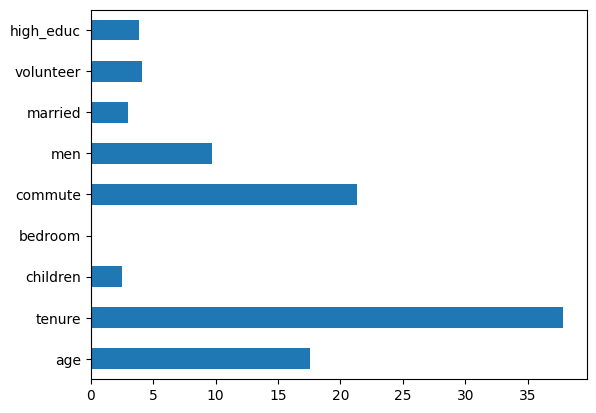

In [20]:
# Insert your code here:
pd.Series(rf_cv.best_estimator_.feature_importances_*100, index=X_train.columns).plot(kind='barh');

'# Give the verbal answer here:
- Responses may vary here dependent on the hyperparameters chosen by the students and the randomness of the procedure, but usually it we get tenure, age and commute as the most important features. Tenure and age are of course highly correlated, so the reasons for this may be the same: More experience leads to higher performance. Commute is more difficult. Perhaps employees living further away are, on average, more engaged in working at the specific company (selection effect).

**f)** Now get an unbiased estimate of the squared error of the optimal Random Forest regressor you found in d). Explain why this estimate is better than calculating the mean squared error on the training set.
<div style="text-align: right"> <b>4 points</b> </div>

In [21]:
# Insert your code here:
from sklearn.metrics import mean_squared_error

y_pred = rf_cv.predict(X_test)

print('test MSE: ', mean_squared_error(y_test, y_pred))

test MSE:  0.44803641567287233


'# Give the verbal answer here:
- If we use the training data to get an estimate of the regressor's general performance, we are using data that the model already "knows" and was fitted on. Thus, this will generally lead to a too optimistic estimate. Therefore, it is better to use the test data which the model has not "seen" to get the estimate.